Problem 1: **Hydrogen atom-1:** Plot the probability densities for the radial wavefunctions of
Hydrogen atom corresponding to three lowest states (1s,2s and 3s). You can use the exact results for
the normalized wavefunctions given in any Quantum Mechanics textbook(eg. Griffiths). The
wavefunction for 1s is given below as an example.
\begin{align}
   \frac{e^\frac{-r}{a_0}}{\sqrt{\pi}a_0^\frac{3}{2}}
  \end{align} 



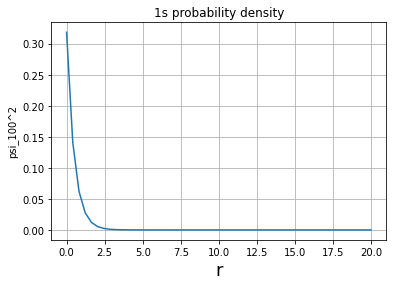

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as cons

# Plotting 1s
r = np.linspace(0,20,50)
pi = cons.pi
a_0 = 1
psi_100 = (np.exp(-r/a_0)/np.sqrt(pi)*(a_0)**(3/2))
psi_200 = (np.exp(-r/2*a_0)*(2-(r/a_0)))/4*np.sqrt(2*pi)*(a_0)**(3/2)
psi_300 = (np.exp(-r/2*a_0)*(27 - 18*(r/a_0) + 2*(r**2/a_0**2)))/81*np.sqrt(3*pi)*(a_0)**(3/2)
plt.plot(r,(psi_100**2))
plt.xlabel('r',size='18')
plt.ylabel('psi_100^2')
plt.title("1s probability density")
plt.grid()
plt.show()

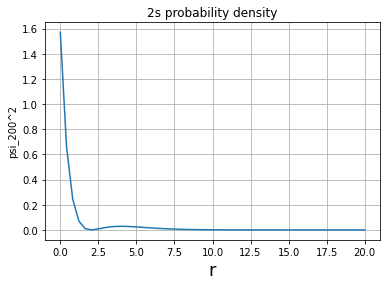

In [30]:
# PLotting 2s
plt.plot(r,(psi_200**2))
plt.xlabel('r',size='18')
plt.ylabel('psi_200^2')
plt.title("2s probability density")
plt.grid()
plt.show()

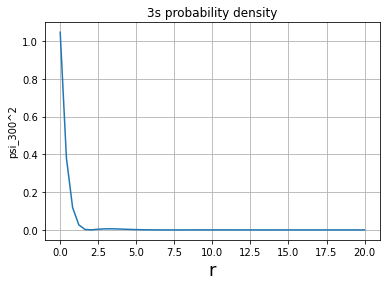

In [31]:
# Plotting 3s
plt.plot(r,(psi_300**2))
plt.xlabel('r',size='18')
plt.ylabel('psi_300^2')
plt.title("3s probability density")
plt.grid()
plt.show()

Problem 2: **Hydrogen atom-2:**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  


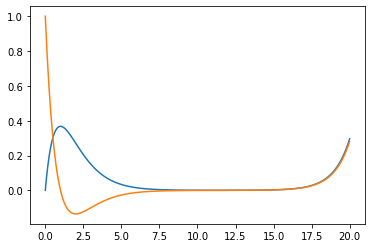

In [57]:
from scipy import *
from scipy import integrate
from scipy import optimize

# Part 1

def Schroed_deriv(y,r,l,En):
    "Given y=[u,u'] returns dy/dr=[u',u''] "
    (u,up) = y
    return array([up, (l*(l+1)/r**2-2/r-En)*u])

R = linspace(1e-10,20,500)
l=0
E0=-1.0

ur = integrate.odeint(Schroed_deriv, [0.0, 1.0], R, args=(l,E0))
from pylab import *
%matplotlib inline

plot(R,ur)
show()

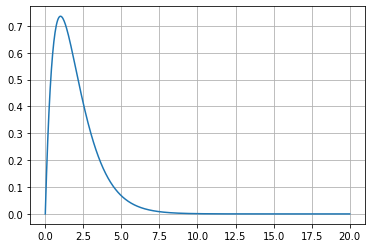

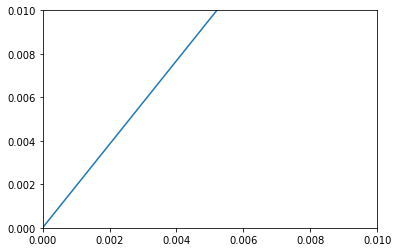

In [58]:
# Part 2 (inverting the mesh)

R = linspace(1e-10,20,500)
l=0
E0=-1.0
Rb=R[::-1] # invert the mesh

urb = integrate.odeint(Schroed_deriv, [0.0, -1e-5], Rb, args=(l,E0))
ur = urb[:,0][::-1] # we take u(r) and invert it in R.

norm=integrate.simps(ur**2,x=R)
ur *= 1./sqrt(norm)
plot(R,ur)
grid()
show()
plot(R,ur)
xlim(0,0.01)
ylim(0,0.01)
show()

Problem 3: Simple(charged) Harmonic Oscillator(SHO): Consider a one dimensional harmonic
oscillator in a constant electric field ⃗E
with charge on the oscillator q oscillating on the x -axis. The
Hamiltonian is given by  
   \begin{align}
       H = \frac{h^2}{2m}\frac{d^2}{dx^2} + \frac{1}{2}mw^2x^2 -qEx
       \end{align}
1. Plot the first three eigenfunctions.(hint: This perturbed oscillator has an analogous form to the
original unperturbed SHO).
2. Show by plotting that the perturbed energies of the charged simple harmonic oscillator are shifted
downward by a constant term.       


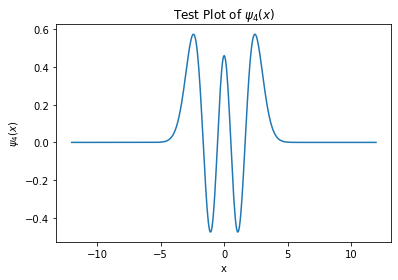

In [62]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm
import math

#Choose simple units
m=1.
w=1.
hbar=1.
#Discretized space
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x
    herm_coeffs = numpy.zeros(n+1)
    herm_coeffs[n] = 1
    return Herm.hermval(xi, herm_coeffs)
  
def stationary_state(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    prefactor = 1./math.sqrt(2.**n * math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = prefactor * numpy.exp(- xi**2 / 2) * hermite(x,n)
    return psi

plt.figure()
plt.plot(x, stationary_state(x,4))
plt.xlabel(r"x")
plt.ylabel(r"$\psi_4(x)$")
plt.title(r"Test Plot of $\psi_4(x)$")
plt.show()